# Imports:

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models, preprocessing, losses
import matplotlib.pyplot as plt
from os import listdir, mkdir, path
import numpy as np
from PIL import Image

# Load Coin Dataset:

In [18]:
def normalize(image, label):
  image = image / 255.0
  return image, label

labels = listdir('images/')
try:
  labels.remove('.DS_Store')
except ValueError:
  pass
labels.sort()

dataset = preprocessing.image_dataset_from_directory(
  'images/',
  labels="inferred",
  label_mode="int",
  class_names=None,
  color_mode="rgb",
  batch_size=64,
  image_size=(500, 500),
  shuffle=True,
  interpolation="bilinear",
)
dataset = dataset.map(normalize)

Found 5158 files belonging to 119 classes.


# Display Coin Images:

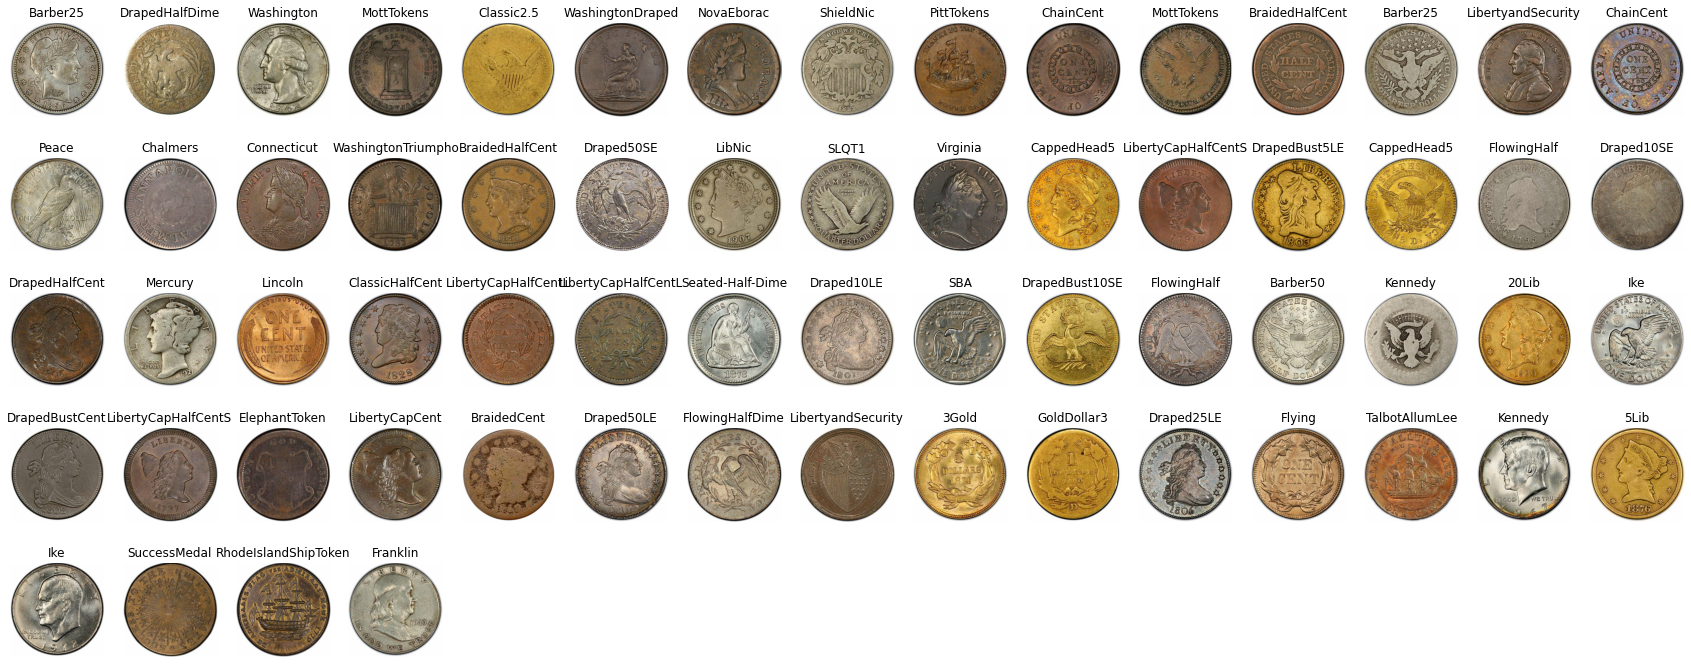

In [20]:
fig = plt.figure(figsize=(30, 12))
X_batch, y_batch = next(dataset.as_numpy_iterator())
for i in range(64):
  fig.add_subplot(5, 15, i + 1)
  plt.imshow(X_batch[i])
  plt.axis('off')
  plt.title(labels[y_batch[i]])

# Create CNN:

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(500, 500, 3)))
model.add(layers.MaxPooling2D((5, 5)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((5, 5)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(119))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 496, 496, 32)      2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 95, 95, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 64)        102464    
_________________________________________________________________
flatten_1 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

# Train Model:

In [22]:
model.compile(optimizer='adam', loss=losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(dataset, epochs=10)

Epoch 1/10
81/81 [==============================] - 363s 4s/step - loss: 4.6960 - accuracy: 0.0128
Epoch 2/10
81/81 [==============================] - 356s 4s/step - loss: 3.9452 - accuracy: 0.0816
Epoch 3/10
81/81 [==============================] - 348s 4s/step - loss: 2.1486 - accuracy: 0.4438
Epoch 4/10
81/81 [==============================] - 336s 4s/step - loss: 0.9745 - accuracy: 0.7218
Epoch 5/10
81/81 [==============================] - 336s 4s/step - loss: 0.5472 - accuracy: 0.8313
Epoch 6/10
81/81 [==============================] - 336s 4s/step - loss: 0.3384 - accuracy: 0.8982
Epoch 7/10
81/81 [==============================] - 336s 4s/step - loss: 0.2137 - accuracy: 0.9399
Epoch 8/10
81/81 [==============================] - 335s 4s/step - loss: 0.1497 - accuracy: 0.9562
Epoch 9/10
81/81 [==============================] - 335s 4s/step - loss: 0.1039 - accuracy: 0.9684
Epoch 10/10
81/81 [==============================] - 336s 4s/step - loss: 0.0721 - accuracy: 0.9783


# Save Model:

In [110]:
model.save('coin_classifier_model')

2021-10-15 00:08:55.760456: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: coin_classifier_model/assets


# Test Images:

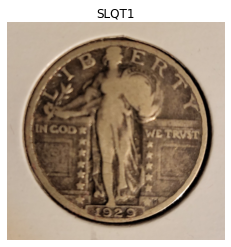

In [112]:
img = Image.open('test4.jpg')
img = img.resize(size=(500, 500))
img_data = np.divide(preprocessing.image.img_to_array(img), 255.0)
img_dataset = tf.data.Dataset.from_tensors([img_data])
prediction = model.predict(img_dataset)
plt.title(labels[np.argmax(prediction[0])])
plt.axis('off')
plt.imshow(img_data)
